# OpenScope's Dendritic Coupling Dataset
By examining somato-dendritic coupling in multiple regions and laminae, this project generate important new data regarding the mechanisms of predictive learning in the neocortex. 

Predicting what will happen next is a critical brain function. For example, a mouse hunting a cricket must pounce towards the location where the cricket will be, and not where they are at the time of pounce initiation. Neurons in computational models trained to make accurate predictions learn to respond to stimuli similarly to the way neurons in the neocortex do. And, several theories of cortical function show that predictive learning can explain many facets of cognition, memory and decision making. Thus, altogether, accumulating evidence suggests that the neocortex learns in an unsupervised manner by predicting upcoming sensory inputs, and then learning from the difference between the predictions and the sensations. The experiments we propose here are designed to elucidate the physiological mechanisms driving such predictive learning.  

Importantly, in the neocortex, predictions about incoming inputs likely arrive in the superficial layers of the cortical sheet where they are received by the distal apical dendrites of pyramidal neurons. These distal apical dendrites are electrotonically segregated from the somata under passive propagation of membrane potential, but can strongly drive somatic activity when apical inputs are coincident with inputs to the perisomatic region. As a result, one leading hypothesis for predictive learning in the neocortex is that when predictions match incoming sensory data, there should be increased coupling between the apical dendrites and somata, driving plasticity via high-frequency bursts induced by calcium channel-driven plateau potentials in the apical dendrites. An alternative hypothesis is that apical dendrites may themselves compute the difference between predicted and actual somatic activity thanks to apical-targeting dendritic inhibition18. In this alternate hypothesis, somato-dendritic coupling should be strongest when internal predictions do not match incoming sensory data. Furthermore, as an animal gets more exposure to a previously unexpected stimulus, rendering it predictable, the first hypothesis predicts that coupling will increase, whereas the second hypothesis predicts that coupling will decrease. Thus, there are two mechanistically distinct hypotheses regarding predictive learning in the neocortex with opposing implications for how somato-dendritic coupling should depend on stimuli and how it should evolve as the brain learns to make better predictions.  

By examining this somato-dendritic coupling in multiple regions and laminae, we will generate important new data regarding the mechanisms of predictive learning in the neocortex. As well, by observing how coupling changes over multiple days of exposure to the stimuli, we can further differentiate between the mechanistic hypotheses discussed above. Moreover, even if the data matches neither hypothesis, the dataset produced will provide a rich source of information for the neuroscience community regarding predictive learning in the brain, which is becoming a cornerstone of our theoretical accounts of cortical computation. 

![dendritic_coupling_fig3.png](../../data/images/dendritic_coupling_fig3.png)

### Environment Setup
⚠️**Note: If running on a new environment, run this cell once and then restart the kernel**⚠️

In [1]:
try:
    from dandi_utils import dandi_download_open
except:
    !git clone https://github.com/AllenInstitute/openscope_databook.git
    %cd openscope_databook
    %pip install -e .

c:\Users\carter.peene\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\carter.peene\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\carter.peene\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np


from mpl_interactions import hyperslicer
from mpl_interactions import ipyplot as iplt

from scipy import interpolate
from scipy.stats import ttest_ind

%matplotlib inline

### Downloading Ophys File

In [3]:
dandiset_id = "000336"
# dandi_filepath = "sub-621602/sub-621602_ses-1194809891-acq-1194973904_ophys.nwb"
# dandi_filepath = "sub-621603/sub-621603_ses-1194683535-acq-1194752582_ophys.nwb"
dandi_filepath = "sub-621602/sub-621602_ses-1194555869-acq-1194754131_image+ophys.nwb"
# dandi_filepath = "sub-621603/sub-621603_ses-1194683535-acq-1194752582_ophys.nwb"
download_loc = "."
dandi_api_key = os.environ["DANDI_API_KEY"]

In [4]:
# This can sometimes take a while depending on the size of the file
io = dandi_download_open(dandiset_id, dandi_filepath, download_loc, dandi_api_key=dandi_api_key)
nwb = io.read()

A newer version (0.59.0) of dandi/dandi-cli is available. You are using 0.55.1


File already exists
Opening file


c:\Users\carter.peene\AppData\Local\Programs\Python\Python39\lib\site-packages\hdmf\spec\namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.1 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
c:\Users\carter.peene\AppData\Local\Programs\Python\Python39\lib\site-packages\hdmf\spec\namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
c:\Users\carter.peene\AppData\Local\Programs\Python\Python39\lib\site-packages\hdmf\spec\namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.2.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


### Imaging Metadata
Unlike our Ecephys files, each experimental session in the Dendritic Coupling project has many files, one for each plane imaged. Here we examine the experimental metadata from this file's imaging plane. Below we can see the imaging depth, and the number of planes in this group. The imaging frame rate and the brain region are also shown.

In [5]:
nwb.lab_meta_data

{'metadata': metadata abc.OphysMetadata at 0x1548956542240
 Fields:
   experiment_container_id: 0
   field_of_view_height: 512
   field_of_view_width: 512
   imaging_depth: 351
   imaging_plane_group: 0
   imaging_plane_group_count: 4
   ophys_experiment_id: 1194754131
   ophys_session_id: 1194555869}

In [6]:
nwb.imaging_planes

{'imaging_plane_1': imaging_plane_1 pynwb.ophys.ImagingPlane at 0x1548958129936
 Fields:
   conversion: 1.0
   description: (512, 512) field of view in VISp at depth 351 um
   device: MESO.2 pynwb.device.Device at 0x1548958330640
 Fields:
   description: Allen Brain Observatory - Mesoscope 2P Rig
 
   excitation_lambda: 910.0
   imaging_rate: 11.0
   indicator: GCaMP6f
   location: VISp
   optical_channel: (
     channel_1 <class 'pynwb.ophys.OpticalChannel'>
   )
   unit: meters}

### Stimulus Templates
Here the stimulus templates are extracted from the file. In this experiment, there are a number of different movies shown. This file contains `fwd` movies and `rev` movies which are reversed. There are also `fwd_rev` and `rev_fwd` which reverse the playback in the middle of the video. Image frames of each video are plotted below, along with a cell that allows you to watch the videos. You may change the key used to any of the keys printed here to view the respective stimulus video.

In [7]:
nwb.stimulus_template.keys()

dict_keys(['flower_fwd', 'flower_fwd_rev', 'flower_rev', 'flower_rev_fwd', 'touch_of_evil_fwd', 'touch_of_evil_fwd_rev', 'touch_of_evil_rev', 'touch_of_evil_rev_fwd', 'worms_fwd', 'worms_fwd_rev', 'worms_rev', 'worms_rev_fwd'])

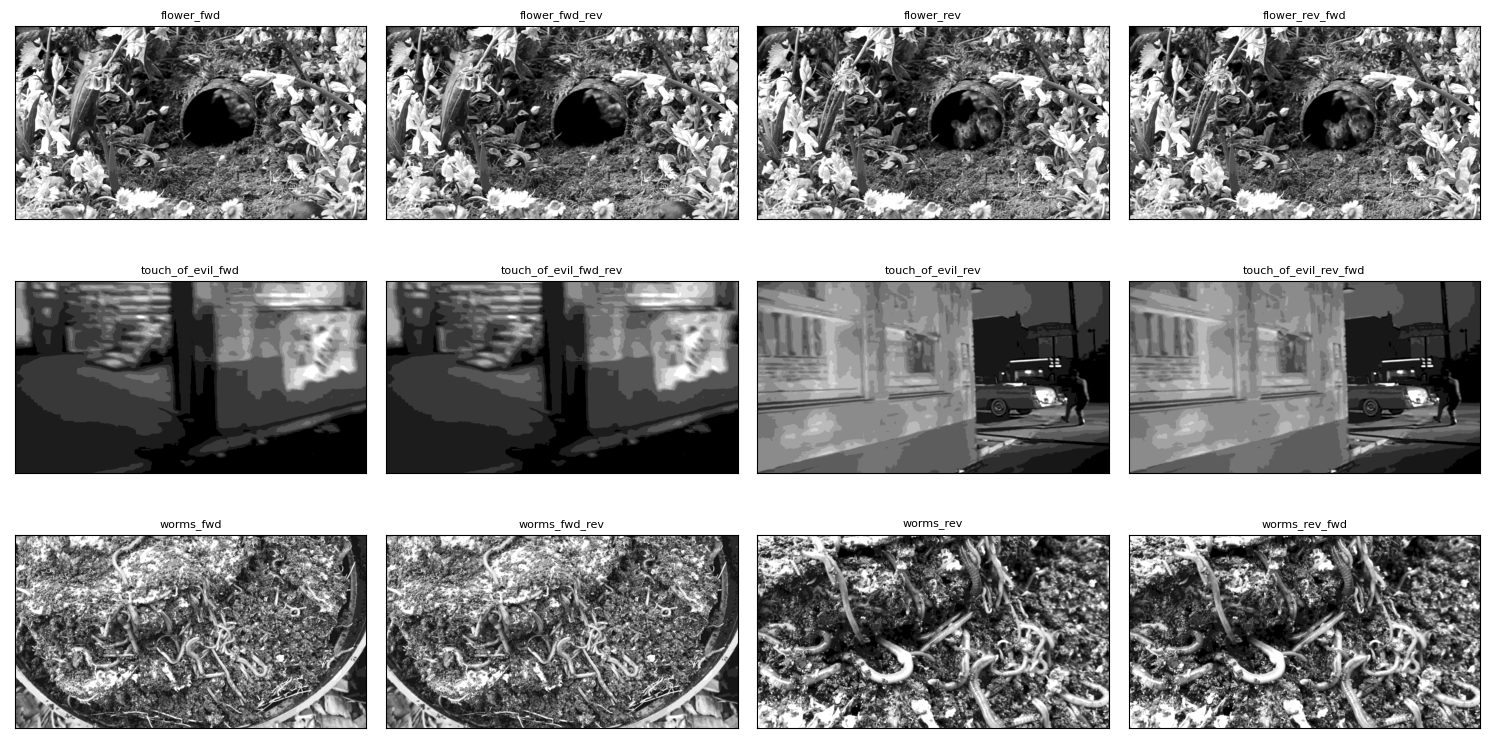

In [8]:
n_cols = 4
n_rows = 3
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15,8))

for i, template_name in enumerate(nwb.stimulus_template.keys()):
    template_img = nwb.stimulus_template[template_name].data[0]

    ax_row = int(i / n_cols)
    ax_col = i % n_cols
    axes[ax_row][ax_col].imshow(template_img, cmap="gray")
    axes[ax_row][ax_col].set_title(template_name, fontsize=8)

for ax in axes.flat:
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])

fig.tight_layout()

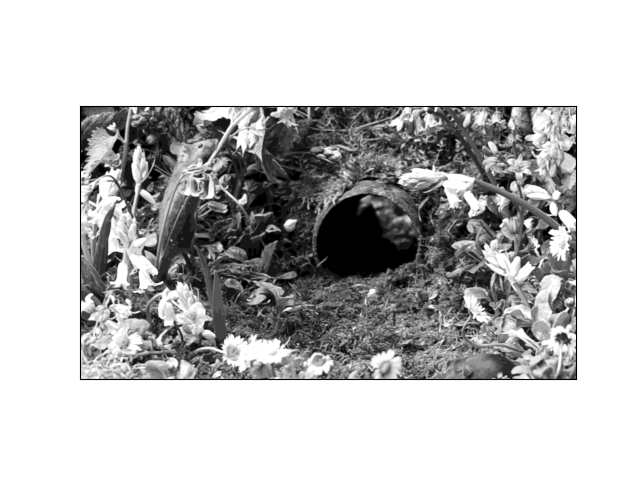

In [9]:
%matplotlib ipympl
plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

# change this key to view other stim template movies
template = nwb.stimulus_template["flower_fwd"].data
view = hyperslicer(template, play_buttons=True, cmap="gray")

### Selecting Stimulus Times
For each stimulus video, there is an associated stimulus table which records the information on the screen at each timestamp. Here we may choose stimulus times of interest that may be used for analysis. Below, frame 190 of the `worms_fwd_rev` movie. This is chosen because frame 190 is when the movie reverses temporal direction.

In [10]:
nwb.intervals.keys()

dict_keys(['fixed_gabors_presentations', 'gratings_presentations', 'movie_flower_fwd_presentations', 'movie_flower_fwd_rev_presentations', 'movie_flower_rev_fwd_presentations', 'movie_flower_rev_presentations', 'movie_touch_of_evil_fwd_presentations', 'movie_touch_of_evil_fwd_rev_presentations', 'movie_touch_of_evil_rev_fwd_presentations', 'movie_touch_of_evil_rev_presentations', 'movie_worms_fwd_presentations', 'movie_worms_fwd_rev_presentations', 'movie_worms_rev_fwd_presentations', 'movie_worms_rev_presentations', 'rotate_gabors_presentations', 'spontaneous_presentations'])

In [11]:
stim_table = nwb.intervals["movie_worms_fwd_presentations"]
print(stim_table.colnames)
stim_table[:10]

('start_time', 'stop_time', 'stimulus_name', 'stimulus_block', 'frame', 'color', 'contrast', 'opacity', 'ori', 'size', 'units', 'stimulus_index', 'tags', 'timeseries')


,start_time,stop_time,stimulus_name,stimulus_block,frame,color,contrast,opacity,ori,size,units,stimulus_index,tags,timeseries
id,,,,,,,,,,,,,,
0,80.065970,80.099328,movie_worms_fwd,5.0,0.0,"[1.0, 1.0, 1.0]",1.0,1.0,0.0,"[1920.0, 1080.0]",pix,8.0,[stimulus_time_interval],"[(1628, 2, timestamps pynwb.base.TimeSeries at..."
1,80.099328,80.132686,movie_worms_fwd,5.0,1.0,"[1.0, 1.0, 1.0]",1.0,1.0,0.0,"[1920.0, 1080.0]",pix,8.0,[stimulus_time_interval],"[(1630, 2, timestamps pynwb.base.TimeSeries at..."
2,80.132686,80.166044,movie_worms_fwd,5.0,2.0,"[1.0, 1.0, 1.0]",1.0,1.0,0.0,"[1920.0, 1080.0]",pix,8.0,[stimulus_time_interval],"[(1632, 2, timestamps pynwb.base.TimeSeries at..."
3,80.166044,80.199402,movie_worms_fwd,5.0,3.0,"[1.0, 1.0, 1.0]",1.0,1.0,0.0,"[1920.0, 1080.0]",pix,8.0,[stimulus_time_interval],"[(1634, 2, timestamps pynwb.base.TimeSeries at..."
4,80.199402,80.232760,movie_worms_fwd,5.0,4.0,"[1.0, 1.0, 1.0]",1.0,1.0,0.0,"[1920.0, 1080.0]",pix,8.0,[stimulus_time_interval],"[(1636, 2, timestamps pynwb.base.TimeSeries at..."
5,80.232760,80.266118,movie_worms_fwd,5.0,5.0,"[1.0, 1.0, 1.0]",1.0,1.0,0.0,"[1920.0, 1080.0]",pix,8.0,[stimulus_time_interval],"[(1638, 2, timestamps pynwb.base.TimeSeries at..."
6,80.266118,80.299476,movie_worms_fwd,5.0,6.0,"[1.0, 1.0, 1.0]",1.0,1.0,0.0,"[1920.0, 1080.0]",pix,8.0,[stimulus_time_interval],"[(1640, 2, timestamps pynwb.base.TimeSeries at..."
7,80.299476,80.332834,movie_worms_fwd,5.0,7.0,"[1.0, 1.0, 1.0]",1.0,1.0,0.0,"[1920.0, 1080.0]",pix,8.0,[stimulus_time_interval],"[(1642, 2, timestamps pynwb.base.TimeSeries at..."
8,80.332834,80.366191,movie_worms_fwd,5.0,8.0,"[1.0, 1.0, 1.0]",1.0,1.0,0.0,"[1920.0, 1080.0]",pix,8.0,[stimulus_time_interval],"[(1644, 2, timestamps pynwb.base.TimeSeries at..."


In [12]:
print(np.mean(np.diff(stim_table.start_time)))
print(set(stim_table.frame))

0.4224204045288495
{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0

In [13]:
# flower video reverses around frame 190
rev_stim_select = lambda row: row.frame.item() == 190
rev_stim_times = [float(stim_table[i].start_time) for i in range(len(stim_table)) if rev_stim_select(stim_table[i])]
print(len(rev_stim_times))

15


### Extracting ROI Fluorescence

In [14]:
dff = nwb.processing["ophys"]["dff"]
dff_trace = dff.roi_response_series["traces"].data
dff_timestamps = dff.roi_response_series["traces"].timestamps

print(dff_trace.shape)
print(dff_timestamps.shape)

avg_dff_trace = np.average(dff_trace, axis=1)

(44184, 83)
(44184,)


### Session Timeline
To get a good idea of the order and the way stimulus is shown throughout the session, the code below generates a timeline of the various 'epochs' of stimulus. It can be seen that there is a random order of each of the stimulus movies shown in succession, followed by a long epoch of fixed gabors and rotating gabors.

In [15]:
# extract epoch times from stim table where stimulus rows have a different 'block' than following row
# returns list of epochs, where an epoch is of the form (stimulus name, stimulus block, start time, stop time)
def extract_epochs(stim_name, stim_table, epochs):
    
    # specify a current epoch stop and start time
    epoch_start = stim_table.start_time[0]
    epoch_stop = stim_table.stop_time[0]

    # for each row, try to extend current epoch stop_time
    for i in range(len(stim_table)):
        this_block = stim_table.stimulus_block[i]
        # if end of table, end the current epoch
        if i+1 >= len(stim_table):
            epochs.append((stim_name, this_block, epoch_start, epoch_stop))
            break
            
        next_block = stim_table.stimulus_block[i+1]
        # if next row is the same stim block, push back epoch_stop time
        if next_block == this_block:
            epoch_stop = stim_table.stop_time[i+1]
        # otherwise, end the current epoch, start new epoch
        else:
            epochs.append((stim_name, this_block, epoch_start, epoch_stop))
            epoch_start = stim_table.start_time[i+1]
            epoch_stop = stim_table.stop_time[i+1]
    
    return epochs

In [16]:
# extract epochs from all valid stimulus tables
epochs = []
for stim_name in nwb.intervals.keys():
    stim_table = nwb.intervals[stim_name]
    try:
        epochs = extract_epochs(stim_name, stim_table, epochs)
    except:
        continue

# epochs take the form (stimulus name, stimulus block, start time, stop time)
print(len(epochs))
epochs.sort(key=lambda x: x[2])
for epoch in epochs:
    print(epoch)

185
('movie_flower_fwd_presentations', 0.0, 30.024629999999995, 39.03206821101215)
('movie_touch_of_evil_fwd_presentations', 1.0, 40.03292, 49.04024821101215)
('movie_touch_of_evil_rev_fwd_presentations', 2.0, 50.04113, 59.04852821101215)
('movie_worms_fwd_rev_presentations', 3.0, 60.04941, 69.05676821101214)
('movie_worms_rev_fwd_presentations', 4.0, 70.05757999999999, 79.06505821101216)
('movie_worms_fwd_presentations', 5.0, 80.06596999999998, 89.07328821101216)
('movie_touch_of_evil_fwd_rev_presentations', 6.0, 90.0741, 99.08156821101214)
('movie_flower_fwd_rev_presentations', 7.0, 100.08244999999998, 109.08980821101214)
('movie_flower_rev_presentations', 8.0, 110.09063, 119.09807821101217)
('movie_flower_rev_fwd_presentations', 9.0, 120.09895, 129.10632821101217)
('movie_worms_rev_presentations', 10.0, 130.10714000000002, 139.11459821101215)
('movie_touch_of_evil_rev_presentations', 11.0, 140.11548000000002, 149.12283821101215)
('movie_worms_fwd_rev_presentations', 12.0, 150.12367,

In [17]:
# can set these manually to get a closer look at the timeline
time_start = min(epochs, key=lambda epoch: epoch[1])[1]
time_end = max(epochs, key=lambda epoch:epoch[2])[2]
# time_start = 3000
# time_end = 3100

# can set this to change what trace is displayed alongside epochs
display_trace = avg_dff_trace * 100 # to yield percentage
# unit_idx = 30
# display_trace = dff_trace[:,unit_idx] * 100

0.1940623410438961


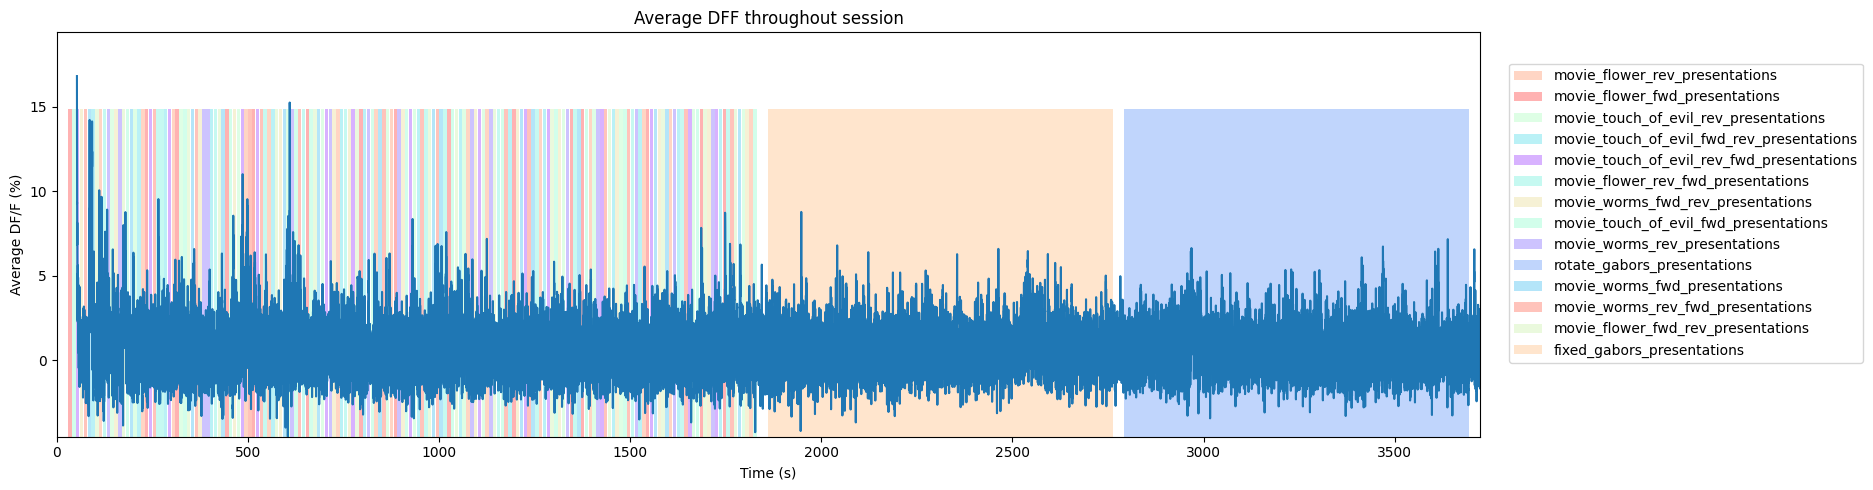

In [18]:
%matplotlib inline
### make plot of chosen fluorescence trace over time with colored epoch sections

fig, ax = plt.subplots(figsize=(15,5))

# filter epochs which aren't at least partially in the time window
bounded_epochs = {epoch for epoch in epochs if epoch[2] < time_end and epoch[3] > time_start}

# assign unique color to each stimulus name
stim_names = list({epoch[0] for epoch in bounded_epochs})
colors = plt.cm.rainbow(np.linspace(0,1,len(stim_names)))
stim_color_map = {stim_names[i]:colors[i] for i in range(len(stim_names))}

epoch_key = {}
y_hi = np.amax(display_trace) # change these to manually set height of the plot
y_lo = np.amin(display_trace)
# draw colored rectangles for each epoch
for epoch in bounded_epochs:
    stim_name, stim_block, epoch_start, epoch_end = epoch
    color = stim_color_map[stim_name]
    rec = ax.add_patch(mpl.patches.Rectangle((epoch_start, y_lo), epoch_end-epoch_start, y_hi, alpha=0.3, facecolor=color))
    epoch_key[(stim_name)] = rec

ax.set_xlim(time_start, time_end)
ax.set_ylim(y_lo, y_hi)
ax.set_xlabel("Time (s)")
ax.set_ylabel("Average DF/F (%)")
ax.set_title("Average DFF throughout session")

fig.legend(epoch_key.values(), epoch_key.keys(), loc="lower right", bbox_to_anchor=(1.25, 0.25))
ax.plot(dff_timestamps[:], display_trace)

print(np.amax(avg_dff_trace))
plt.tight_layout()
plt.show()

### Viewing Behavioral Data
Our sessions contain multiple modalities of behavioral data, including eye tracking. Below the eye angle over time is shown.

In [19]:
eye_tracking = nwb.acquisition["EyeTracking"]
eye_tracking

EyeTracking abc.EllipseEyeTracking at 0x1548958420080
Fields:
  corneal_reflection_tracking: corneal_reflection_tracking abc.EllipseSeries at 0x1548958128544
Fields:
  angle: <HDF5 dataset "angle": shape (242895,), type "<f8">
  area: <HDF5 dataset "area": shape (242895,), type "<f8">
  area_raw: <HDF5 dataset "area_raw": shape (242895,), type "<f8">
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (242895, 2), type "<f8">
  description: no description
  height: <HDF5 dataset "height": shape (242895,), type "<f8">
  interval: 1
  offset: 0.0
  reference_frame: nose
  resolution: -1.0
  timestamps: eye_tracking abc.EllipseSeries at 0x1548958327088
Fields:
  angle: <HDF5 dataset "angle": shape (242895,), type "<f8">
  area: <HDF5 dataset "area": shape (242895,), type "<f8">
  area_raw: <HDF5 dataset "area_raw": shape (242895,), type "<f8">
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (242895, 2), type "<f8">
  description: no description
  height: <HDF5 dataset "height": shape (242895,), type "<f8">
  interval: 1
  offset: 0.0
  reference_frame: nose
  resolution: -1.0
  timestamp_link: (
    pupil_tracking <class 'abc.EllipseSeries'>,
    corneal_reflection_tracking <class 'abc.EllipseSeries'>,
    likely_blink <class 'pynwb.base.TimeSeries'>
  )
  timestamps: <HDF5 dataset "timestamps": shape (242895,), type "<f8">
  timestamps_unit: seconds
  unit: meters
  width: <HDF5 dataset "width": shape (242895,), type "<f8">

  timestamps_unit: seconds
  unit: meters
  width: <HDF5 dataset "width": shape (242895,), type "<f8">

  eye_tracking: eye_tracking abc.EllipseSeries at 0x1548958327088
Fields:
  angle: <HDF5 dataset "angle": shape (242895,), type "<f8">
  area: <HDF5 dataset "area": shape (242895,), type "<f8">
  area_raw: <HDF5 dataset "area_raw": shape (242895,), type "<f8">
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (242895, 2), type "<f8">
  description: no description
  height: <HDF5 dataset "height": shape (242895,), type "<f8">
  interval: 1
  offset: 0.0
  reference_frame: nose
  resolution: -1.0
  timestamp_link: (
    pupil_tracking <class 'abc.EllipseSeries'>,
    corneal_reflection_tracking <class 'abc.EllipseSeries'>,
    likely_blink <class 'pynwb.base.TimeSeries'>
  )
  timestamps: <HDF5 dataset "timestamps": shape (242895,), type "<f8">
  timestamps_unit: seconds
  unit: meters
  width: <HDF5 dataset "width": shape (242895,), type "<f8">

  likely_blink: likely_blink pynwb.base.TimeSeries at 0x1548956541376
Fields:
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (242895,), type "|b1">
  description: blinks
  interval: 1
  offset: 0.0
  resolution: -1.0
  timestamps: eye_tracking abc.EllipseSeries at 0x1548958327088
Fields:
  angle: <HDF5 dataset "angle": shape (242895,), type "<f8">
  area: <HDF5 dataset "area": shape (242895,), type "<f8">
  area_raw: <HDF5 dataset "area_raw": shape (242895,), type "<f8">
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (242895, 2), type "<f8">
  description: no description
  height: <HDF5 dataset "height": shape (242895,), type "<f8">
  interval: 1
  offset: 0.0
  reference_frame: nose
  resolution: -1.0
  timestamp_link: (
    pupil_tracking <class 'abc.EllipseSeries'>,
    corneal_reflection_tracking <class 'abc.EllipseSeries'>,
    likely_blink <class 'pynwb.base.TimeSeries'>
  )
  timestamps: <HDF5 dataset "timestamps": shape (242895,), type "<f8">
  timestamps_unit: seconds
  unit: meters
  width: <HDF5 dataset "width": shape (242895,), type "<f8">

  timestamps_unit: seconds
  unit: N/A

  pupil_tracking: pupil_tracking abc.EllipseSeries at 0x1548958417920
Fields:
  angle: <HDF5 dataset "angle": shape (242895,), type "<f8">
  area: <HDF5 dataset "area": shape (242895,), type "<f8">
  area_raw: <HDF5 dataset "area_raw": shape (242895,), type "<f8">
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": 

In [20]:
# extract coords from eye tracking array
xs = np.array([point[0] for point in eye_tracking.eye_tracking.data])
ys = np.array([point[1] for point in eye_tracking.eye_tracking.data])

start_idx = 0
end_idx = len(eye_tracking.eye_tracking.data)
print("Min X:", np.nanmin(xs), "Max X:", np.nanmax(xs))
print("Min Y:", np.nanmin(ys), "Max Y:", np.nanmax(ys))

Min X: 194.70100310306955 Max X: 585.4981877740412
Min Y: 133.8902402624167 Max Y: 280.6943959304114


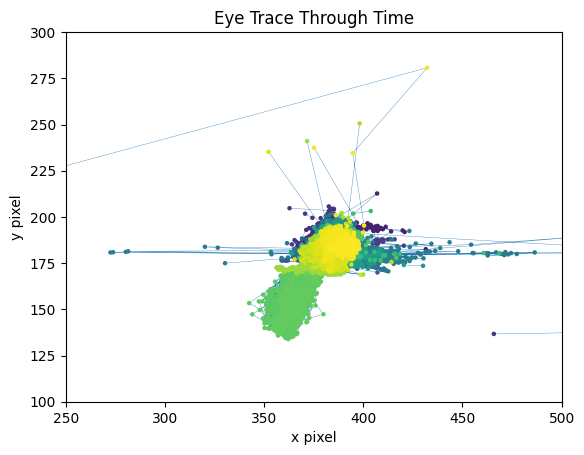

In [21]:
fig, ax = plt.subplots()
colors = plt.cm.viridis(np.linspace(0, 1, end_idx-start_idx))
ax.plot(xs[start_idx:end_idx], ys[start_idx:end_idx], zorder=0, linewidth=0.25)
ax.scatter(xs[start_idx:end_idx], ys[start_idx:end_idx], s=5, c=colors, zorder=1)

# change these to set the plot limits (there are sometimes unusual outliers)
ax.set_xlim(250,500)
ax.set_ylim(100,300)

ax.set_xlabel("x pixel")
ax.set_ylabel("y pixel")
ax.set_title("Eye Trace Through Time")
plt.show()

### Generating Response Windows
Finally, unit responses can be viewed by aligning the selected stimulus times with the fluorescence trace. The fluorescence first must be interpolated, and then response windows are extracted.

In [22]:
window_start_time = -2
window_end_time = 3
interp_hz = 10

In [23]:
# generate regularly-space x values and interpolate along it
time_axis = np.arange(dff_timestamps[0], dff_timestamps[-1], step=(1/interp_hz))
interp_dff = []

# interpolate channel by channel to save RAM
for channel in range(dff_trace.shape[1]):
    f = interpolate.interp1d(dff_timestamps, dff_trace[:,channel], axis=0, kind="nearest", fill_value="extrapolate")
    interp_dff.append(f(time_axis))

interp_dff = np.array(interp_dff)

print(interp_dff.shape)

(83, 39415)


In [24]:
# validate window bounds
if window_start_time > 0:
    raise ValueError("start time must be non-positive number")
if window_end_time <= 0:
    raise ValueError("end time must be positive number")
    
# get event windows
windows = []
window_length = int((window_end_time-window_start_time) * interp_hz)

for stim_ts in rev_stim_times:
    # convert time to index
    start_idx = int( (stim_ts + window_start_time - dff_timestamps[0]) * interp_hz )
    end_idx = start_idx + window_length
 
    # bounds checking
    if start_idx < 0 or end_idx > interp_dff.shape[1]:
        continue
        
    windows.append(interp_dff[:,start_idx:end_idx])
    
if len(windows) == 0:
    raise ValueError("There are no windows for these timestamps")

windows = np.array(windows) * 100 # x100 to convert values to dF/F percentage
neuronwise_windows = np.swapaxes(windows,0,1)

print(neuronwise_windows.shape)

(83, 15, 50)


### Showing Response Windows

In [25]:
%matplotlib inline
def show_dff_response(ax, dff, window_start_time, window_end_time, aspect="auto", vmin=None, vmax=None, yticklabels=[], skipticks=1, xlabel="Time (s)", ylabel="ROI", cbar=True, cbar_label=None):
    if len(dff) == 0:
        print("Input data has length 0; Nothing to display")
        return

    img = ax.imshow(dff, aspect=aspect, extent=[window_start_time, window_end_time, 0, len(dff)], vmin=vmin, vmax=vmax)
    if cbar:
        ax.colorbar(img, shrink=0.5, label=cbar_label)

    ax.plot([0,0],[0, len(dff)], ":", color="white", linewidth=1.0)

    if len(yticklabels) != 0:
        ax.set_yticks(range(len(yticklabels)))
        ax.set_yticklabels(yticklabels, fontsize=8)

        n_ticks = len(yticklabels[::skipticks])
        ax.yaxis.set_major_locator(plt.MaxNLocator(n_ticks))

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

In [26]:
def show_many_responses(windows, rows, cols, window_idxs=None, title=None, subplot_title="", xlabel=None, ylabel=None, cbar_label=None, vmin=0, vmax=100):
    if window_idxs is None:
        window_idxs = range(len(windows))
    windows = windows[window_idxs]
    
    # handle case with no input data
    if len(windows) == 0:
        print("Input data has length 0; Nothing to display")
        return
    # handle cases when there aren't enough windows for number of rows
    if len(windows) < rows*cols:
        rows = (len(windows) // cols) + 1

    fig, axes = plt.subplots(rows, cols, figsize=(2*cols+2, 2*rows+2), layout="constrained")
    # handle case when there's only one row
    if len(axes.shape) == 1:
        axes = axes.reshape((1, axes.shape[0]))
    
    for i in range(rows*cols):
        ax_row = int(i // cols)
        ax_col = i % cols
        ax = axes[ax_row][ax_col]
        
        if i > len(windows)-1:
            ax.set_visible(False)
            continue

        window = windows[i]
        show_dff_response(ax, window, window_start_time, window_end_time, xlabel=xlabel, ylabel=ylabel, cbar=False, vmin=vmin, vmax=vmax)
        ax.set_title(f"{subplot_title} {window_idxs[i]}")
        if ax_row != rows-1:
            ax.get_xaxis().set_visible(False)
        if ax_col != 0:
            ax.get_yaxis().set_visible(False)

    fig.suptitle(title)
    norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
    colorbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm), ax=axes, shrink=1.5/rows, label=cbar_label)

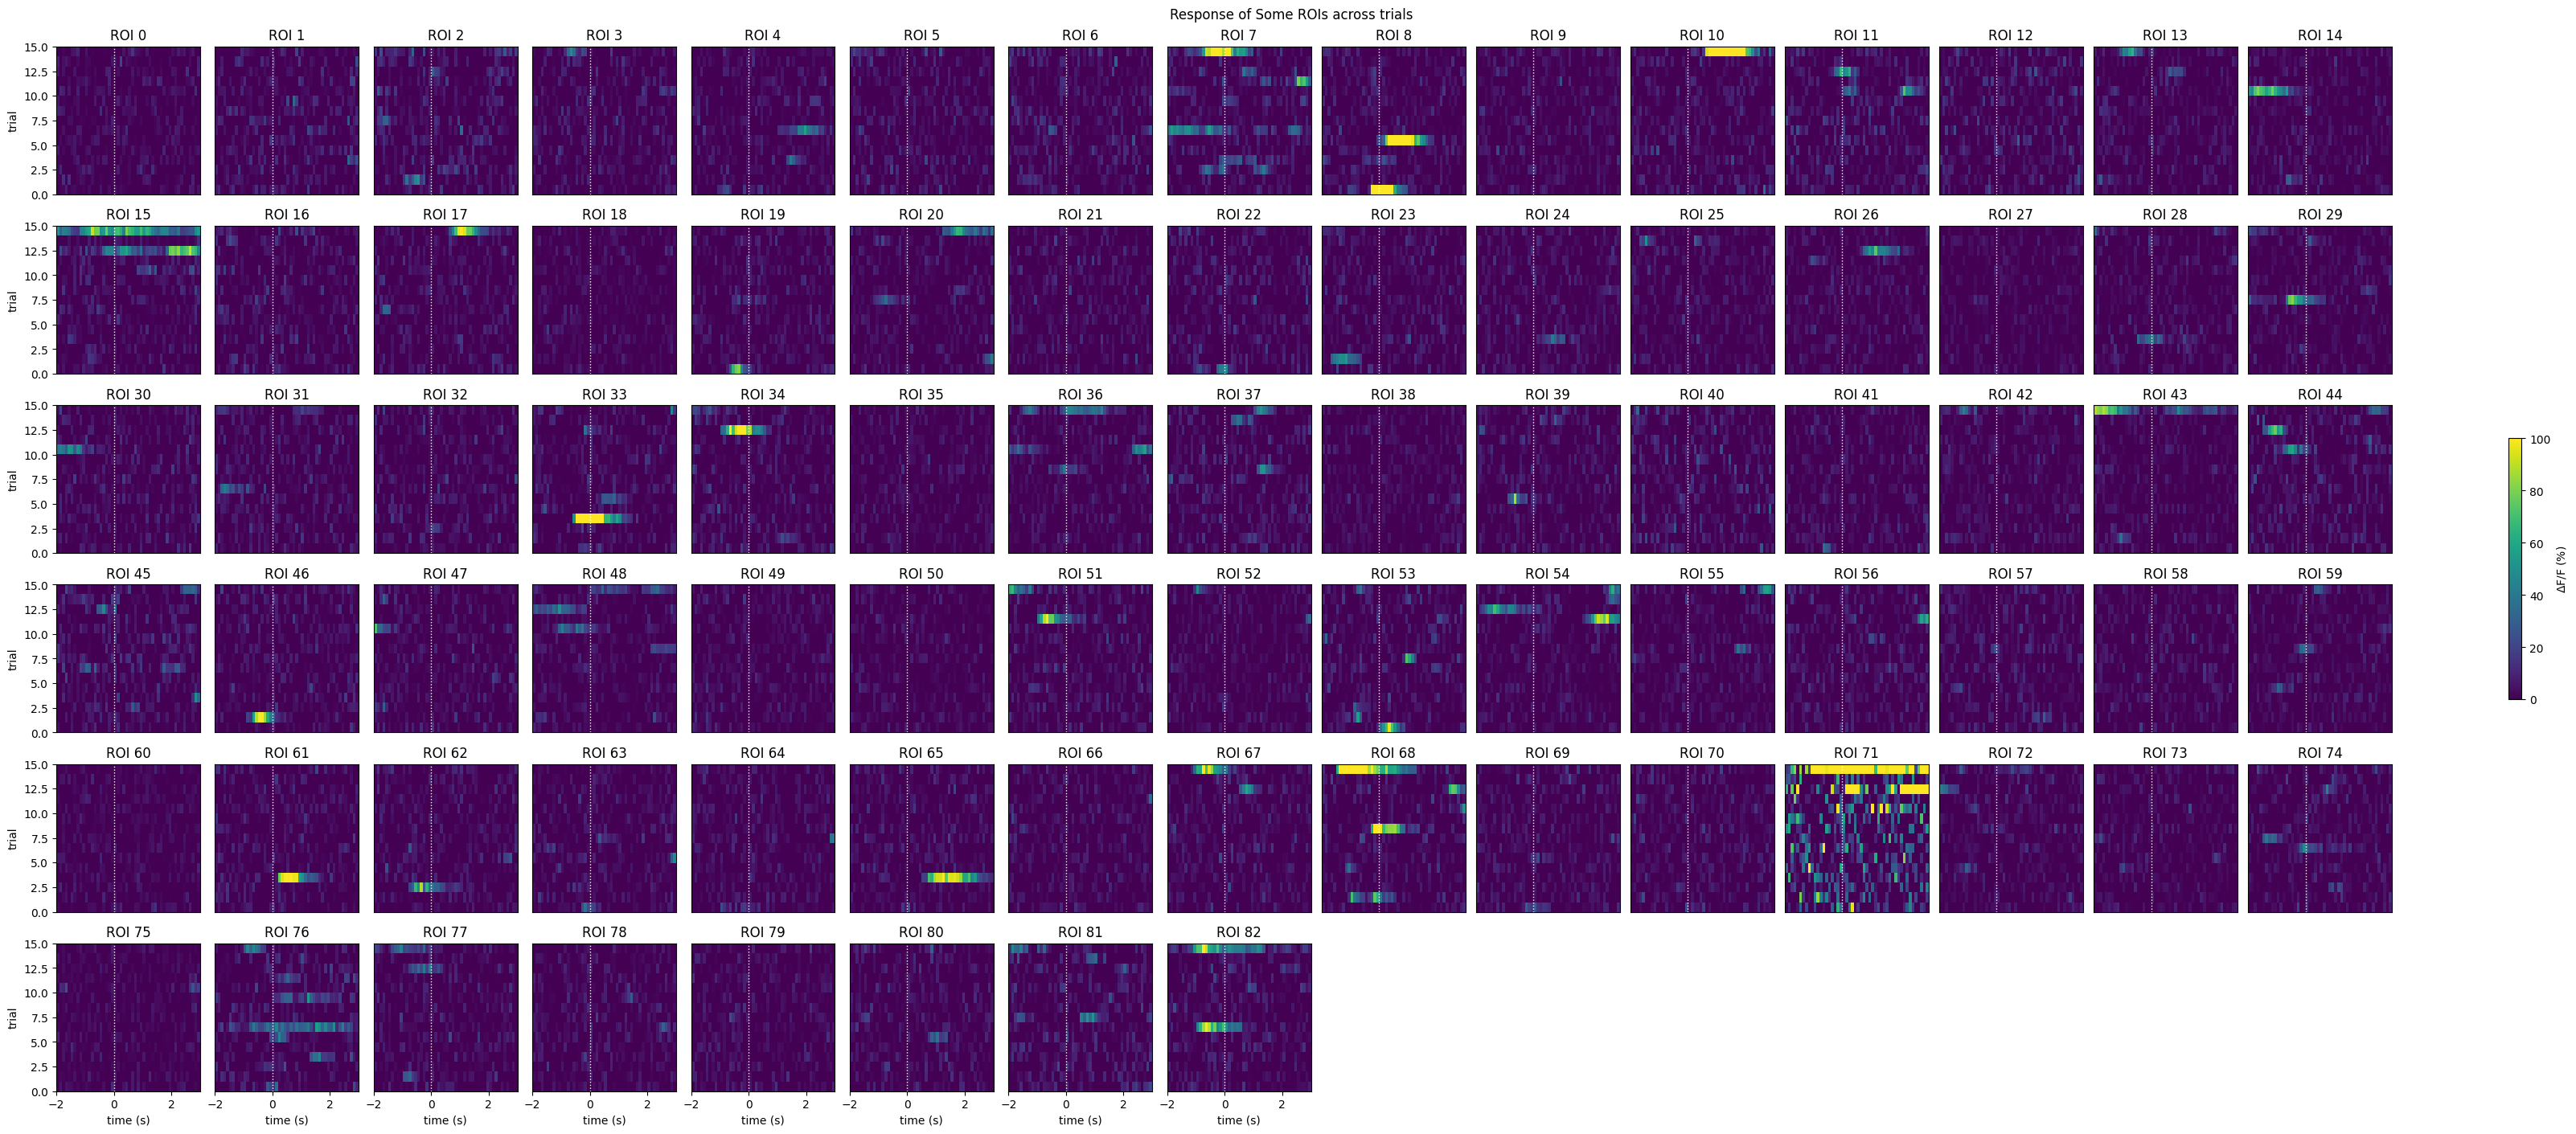

In [27]:
show_many_responses(neuronwise_windows,
                    6,
                    15,
                    title="Response of Some ROIs across trials",
                    subplot_title="ROI",
                    xlabel="time (s)",
                    ylabel="trial",
                    cbar_label="$\Delta$F/F (%)")

### Selecting Cells

In [28]:
# get the index within the window that stimulus occurs (time 0)
stimulus_onset_idx = int(-window_start_time * interp_hz)
baseline = windows[:,:,0:stimulus_onset_idx]
evoked_responses = windows[:,:,stimulus_onset_idx:]

print(stimulus_onset_idx)
print(baseline.shape)
print(evoked_responses.shape)

20
(15, 83, 20)
(15, 83, 30)


In [29]:
mean_trial_responses = np.mean(evoked_responses, axis=2)
mean_trial_baselines = np.mean(baseline, axis=2)

n = mean_trial_responses.shape[0]
t,p = ttest_ind(mean_trial_responses, mean_trial_baselines)
IC3_selected_rois = np.where(p < 0.05 / n)[0]
print(f"Selected ROIs {IC3_selected_rois}")

Selected ROIs [79]


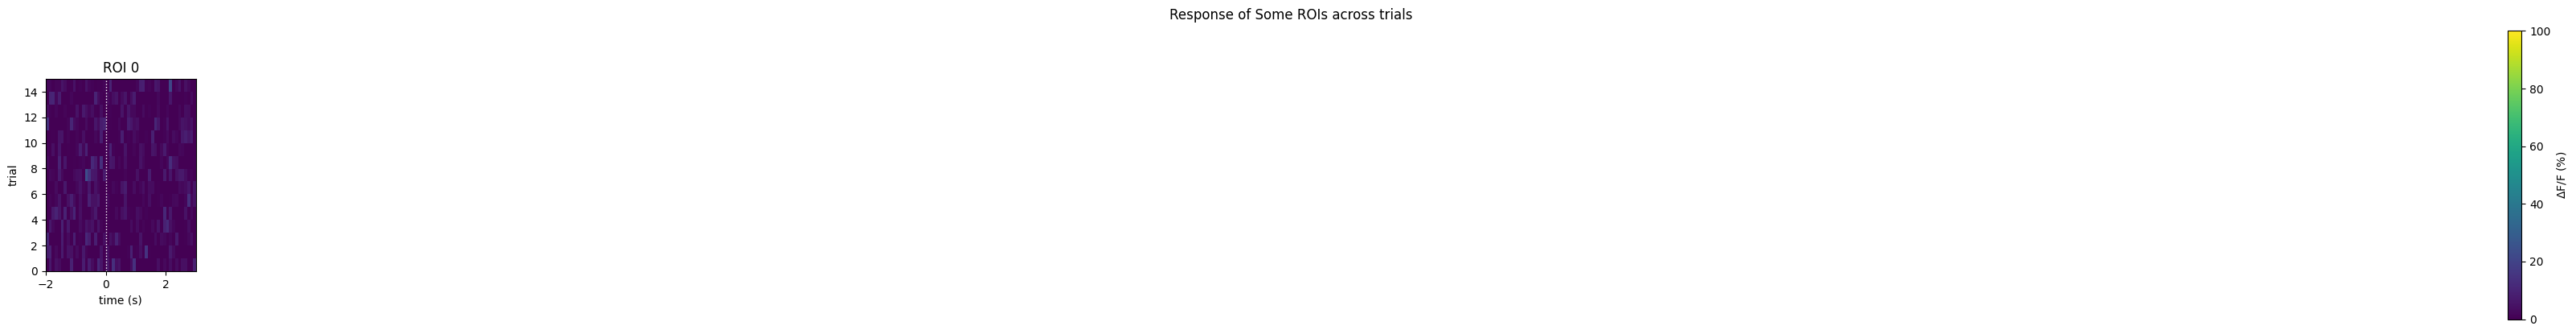

In [30]:
show_many_responses(neuronwise_windows[IC3_selected_rois],
                    6,
                    15,
                    title="Response of Some ROIs across trials",
                    subplot_title="ROI",
                    xlabel="time (s)",
                    ylabel="trial",
                    cbar_label="$\Delta$F/F (%)")